Polycystic Ovary Syndrome or PCOS is an endocrine disorder that commonly affects women in their reproductive years.PCOS is characterized by irregulairty in the female hormone generation and the increased levels of male hormones production. It affects ten to fifteen percent of women worldwide, causing infertility,ovarian dysfunction, weight gain, irregular menstrual cycles, hirsutism, acne, and hair loss. Prolonged experience of PCOS in women could result in hypertension, increased risk of cardiovascular disease, obesity, ovarian cancer and type 2 diabetes. Further research has shown that PCOS increases the risk of first trimester miscarriage. 

Less than 50% of women are properly diagnosed, leaving many women undiagnosed. Women often go years before a diagnosis, seeing three or more doctors before a confirmed diagnosis. The time and cost involved in varied clinical tests and ultrasounds imposes financial strain for the women struggling with PCOS.  
Early identification and diagnosis of PCOS could help a women in reversing the endocrinal disorder by changing their diet, lifestyle, addition of supplment and herbal remedies, and protect their health. 


Researchers have applied machine learning in early diagnosis of PCOS by using clinical and biochemical variables as features, which acted as an early marker for this hormonal irregularity. 

Source: 
https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=8929674&casa_token=NuG-4m2JqN4AAAAA:kNqnVGrEpq3euQmFi9zE0Kknx1xabyJA_MnAiMpGvnAqFCU7L8WAZLpIGpvgfllY4qU1vCewWg

https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=6139331&casa_token=GHYXqa5dCa8AAAAA:p6eW7fpZ0FIbZF1JspYsQ2cmtcBXDVWhdiV8xNeUvKKs5-t04QJ2_-OSDkGUQZGCIWffAkBndQ&tag=1

https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=9230932&casa_token=LJ5L2RZpkAoAAAAA:M8h7U4xHqfv43Cm6dYb_5fauy04UGaNeXRH9J-Q8-R1J4516QICEry_X28WqK3zhvkPeHyA4Yw

In [38]:
#importing all the required libraries
import pandas as pd
import numpy as np
from IPython.display import Image
import seaborn as sns
sns.set_theme(style='darkgrid')
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from datetime import timedelta
from sklearn import tree
from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [3]:
pcos = pd.read_excel("PCOS_data_without_infertility.xlsx")
pcosinf = pd.read_csv("PCOS_infertility.csv")

In [4]:
#Merging the two files as per patient file no. 
#The files were sorted into two based on patients with infertility and without infertility
data = pd.merge(pcos,pcosinf, on='Patient File No.', suffixes={'','_y'},how='left')

#Dropping the repeated features after merging
data =data.drop(['Unnamed: 44', 'Sl. No_y', 'PCOS (Y/N)_y', '  I   beta-HCG(mIU/mL)_y',
       'II    beta-HCG(mIU/mL)_y', 'AMH(ng/mL)_y'], axis=1)

#Taking a look at the dataset
data.head() 

C:\Users\mehna\AppData\Local\Temp/ipykernel_25764/861028363.py:3: FutureWarning: Passing 'suffixes' as a <class 'set'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  data = pd.merge(pcos,pcosinf, on='Patient File No.', suffixes={'','_y'},how='left')


,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,NaN,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,NaN,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,NaN,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,NaN,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [5]:
#conversion to dataframe
df = pd.DataFrame(data)
df

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.000,19.3,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.500,NaN,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.000,NaN,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.000,NaN,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.000,NaN,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,537,0,35,50.0,164.592,18.5,17,72,16,...,0,0.0,0,110,70,1,0,17.5,10.0,6.7
537,538,538,0,30,63.2,158.000,25.3,15,72,18,...,0,0.0,0,110,70,9,7,19.0,18.0,8.2
538,539,539,0,36,54.0,152.000,23.4,13,74,20,...,0,0.0,0,110,80,1,0,18.0,9.0,7.3
539,540,540,0,27,50.0,150.000,22.2,15,74,20,...,1,0.0,0,110,70,7,6,18.0,16.0,11.5


Features in the dataset

Patient File No. : This is the report number which has data for a particular patient

PCOS : whether the subject of study had PCOS or not?

Age (yrs) : Age of patient in years
Weight (Kg) : Weight of patient in kg

Height(Cm) : Height of patient in centimeter

BMI : Body mass index of the patient

Blood Group : Blood Group of the patient A+ = 11, A- = 12, B+ = 13, B- = 14, O+ =15, O- = 16, AB+ =17, AB- = 18 (total 8 blood groups)
Pulse rate(bpm) : It is the heart rate of patient in beats per minute. Resting heart rate for adults ranges from 60 to 100 beats per minute

RR (breaths/min) : It is the respiration rate. Normal respiration rates for an adult person at rest range from 12 to 16 breaths per minute.

Hb(g/dl) : Hemoglobin levels in gram per deciliter. For women, a normal level ranges between 12.3 gm/dL and 15.3 gm/dL.
Cycle(R/I) :

Cycle length(days) : This represents length of menstrual cycle. The length of the menstrual cycle varies from woman to woman, but the average is to have periods every 28 days.
Marraige Status (Yrs) : Years of marriage

Pregnant(Y/N) : If the patient is pregnant

No. of aborptions : Number of abortions, if any. There are total 541 values out of which 437 patients never had any abortions.

I beta-HCG(mIU/mL) : this is case 1 of beta hcg

II beta-HCG(mIU/mL) : this is case 2 of beta hcg (please note: An beta hCG level of less than 5 mIU/mL is considered negative for pregnancy, and anything above 25 mIU/mL is considered positive for pregnancy) (also the unit mIU/mL is mili International Units per miliLiter)

FSH(mIU/mL) : Its full form is Follicle-stimulating hormone. During puberty: it ranges from 0.3 to 10.0 mIU/mL (0.3 to 10.0 

IU/L) Women who are still menstruating: 4.7 to 21.5 mIU/mL (4.5 to 21.5 IU/L) After menopause: 25.8 to 134.8 mIU/mL (25.8 to 134.8 IU/L)

LH(mIU/mL) : It is Luteinizing Hormone.

FSH/LH : Ratio of FSH and LH

Hip(inch) : Hip size in inches

Waist(inch) : Waist Size in inches

Waist:Hip Ratio : Waist by hip ratio

TSH (mIU/L) : It is thyroid stimulating hormone. Normal values are from 0.4 to 4.0 mIU/L

AMH(ng/mL) : It is Anti-Mullerian Hormone.

PRL(ng/mL) : This represents Prolactin levels.

Vit D3 (ng/mL): Vitamin D levels. Normal vitamin D levels in the blood are 20 ng/ml or above for adults.

PRG(ng/mL): Progesterone levels

RBS(mg/dl): This value is obtained by doing Random Blood Sugar (RBS) Test.

Weight gain(Y/N): Is there been a weight gain

hair growth(Y/N): Is there been a hair growth

Skin darkening (Y/N): Skin darkening issues

Hair loss(Y/N): hair loss issues

Pimples(Y/N): pimples issues

Fast food (Y/N): is fast food part of you diet
Reg.Exercise(Y/N): do you do exercises on a regular basis

BP _Systolic (mmHg): Systolic blood pressure, measures the pressure in your arteries when your heart beats.

BP _Diastolic (mmHg): Diastolic blood pressure, measures the pressure in your arteries when your heart rests between beats.

Follicle No. (L): Follicles number in the left side

Follicle No. (R): Follicles number in the right side

Avg. F size (L) (mm): Average Follicle size in the left side in mm

Avg. F size (R) (mm): Average Follicle size in the right side in mm

Endometrium (mm): Size of Endometrium in mm


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     242 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [7]:
#checking the percentage of nulls in the dataset
(df.isna().sum()*100)/df.shape[0]
#suggestion about percentages about how much null is present

Sl. No                     0.000000
Patient File No.           0.000000
PCOS (Y/N)                 0.000000
 Age (yrs)                 0.000000
Weight (Kg)                0.000000
Height(Cm)                 0.000000
BMI                       55.268022
Blood Group                0.000000
Pulse rate(bpm)            0.000000
RR (breaths/min)           0.000000
Hb(g/dl)                   0.000000
Cycle(R/I)                 0.000000
Cycle length(days)         0.000000
Marraige Status (Yrs)      0.184843
Pregnant(Y/N)              0.000000
No. of aborptions          0.000000
  I   beta-HCG(mIU/mL)     0.000000
II    beta-HCG(mIU/mL)     0.000000
FSH(mIU/mL)                0.000000
LH(mIU/mL)                 0.000000
FSH/LH                    98.336414
Hip(inch)                  0.000000
Waist(inch)                0.000000
Waist:Hip Ratio           98.336414
TSH (mIU/L)                0.000000
AMH(ng/mL)                 0.000000
PRL(ng/mL)                 0.000000
Vit D3 (ng/mL)             0

In [7]:
#statistical information about the dataset
df.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,242.000000,541.000000,541.000000,541.000000,...,541.000000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,23.929752,13.802218,73.247689,19.243993,...,0.489834,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,3.663177,1.840812,4.430285,1.688629,...,0.500359,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,15.100000,11.000000,13.000000,16.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.900000,13.000000,72.000000,18.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.000000,14.000000,72.000000,18.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,25.975000,15.000000,74.000000,20.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


In [8]:
#name of the columns
df.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

In [9]:
#dropping any duplicates
df = df.drop_duplicates()

In [10]:
#overview of the first row
df.iloc[0]

Sl. No                        1
Patient File No.              1
PCOS (Y/N)                    0
 Age (yrs)                   28
Weight (Kg)                44.6
Height(Cm)                152.0
BMI                        19.3
Blood Group                  15
Pulse rate(bpm)              78
RR (breaths/min)             22
Hb(g/dl)                  10.48
Cycle(R/I)                    2
Cycle length(days)            5
Marraige Status (Yrs)       7.0
Pregnant(Y/N)                 0
No. of aborptions             0
  I   beta-HCG(mIU/mL)     1.99
II    beta-HCG(mIU/mL)     1.99
FSH(mIU/mL)                7.95
LH(mIU/mL)                 3.68
FSH/LH                      NaN
Hip(inch)                    36
Waist(inch)                  30
Waist:Hip Ratio             NaN
TSH (mIU/L)                0.68
AMH(ng/mL)                 2.07
PRL(ng/mL)                45.16
Vit D3 (ng/mL)             17.1
PRG(ng/mL)                 0.57
RBS(mg/dl)                 92.0
Weight gain(Y/N)              0
hair gro

In [11]:
#overview of the 2nd, 3rd and 4th row
df.head(4)

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,NaN,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,NaN,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,NaN,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5


In [12]:
#value count of subjects with PCOS
df['PCOS (Y/N)'].value_counts()

0    364
1    177
Name: PCOS (Y/N), dtype: int64

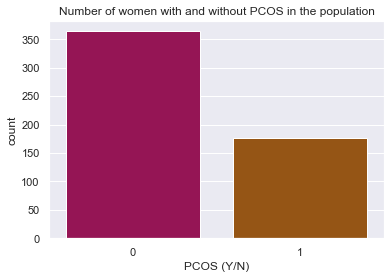

In [13]:
#distribution of the target
sns.countplot(data=df,x ='PCOS (Y/N)', palette = 'brg');
plt.title('Number of women with and without PCOS in the population');

Feature engineering for missing values

In [10]:
#replacement of the string NaN with np.nan
df = df.replace('NaN', np.nan)
#calculation of BMI calc
df['BMI_calc'] = df['Weight (Kg)'] / df['Height(Cm) '].div(100).pow(2).round(3)
df[['BMI','BMI_calc' ]]

,BMI,BMI_calc
0,19.3,19.307359
1,NaN,24.923313
2,NaN,25.275533
3,NaN,29.680365
4,NaN,20.061728
...,...,...
536,18.5,18.456995
537,25.3,25.320513
538,23.4,23.376623
539,22.2,22.222222


### Note : Anderson darling test
shepiro wilk test 
to find out if a distribution is Gaussian or Normal

In [23]:
#filling up the empty cells of waist:hip ratio with actual values by dividing the size of waist with hip
df['Waist:Hip Ratio'] = df['Waist(inch)']/df['Hip(inch)']
df['Waist:Hip Ratio']

0      0.833333
1      0.842105
2      0.900000
3      0.857143
4      0.810811
         ...   
536    0.928571
537    0.941176
538    0.933333
539    0.928571
540    0.958333
Name: Waist:Hip Ratio, Length: 541, dtype: float64

In [11]:
#creating a new column for FSH:LH ratio
df['FSH:LH ratio'] = df['FSH(mIU/mL)']/df['LH(mIU/mL)']

In [87]:
#absolute of correlation I need to plot

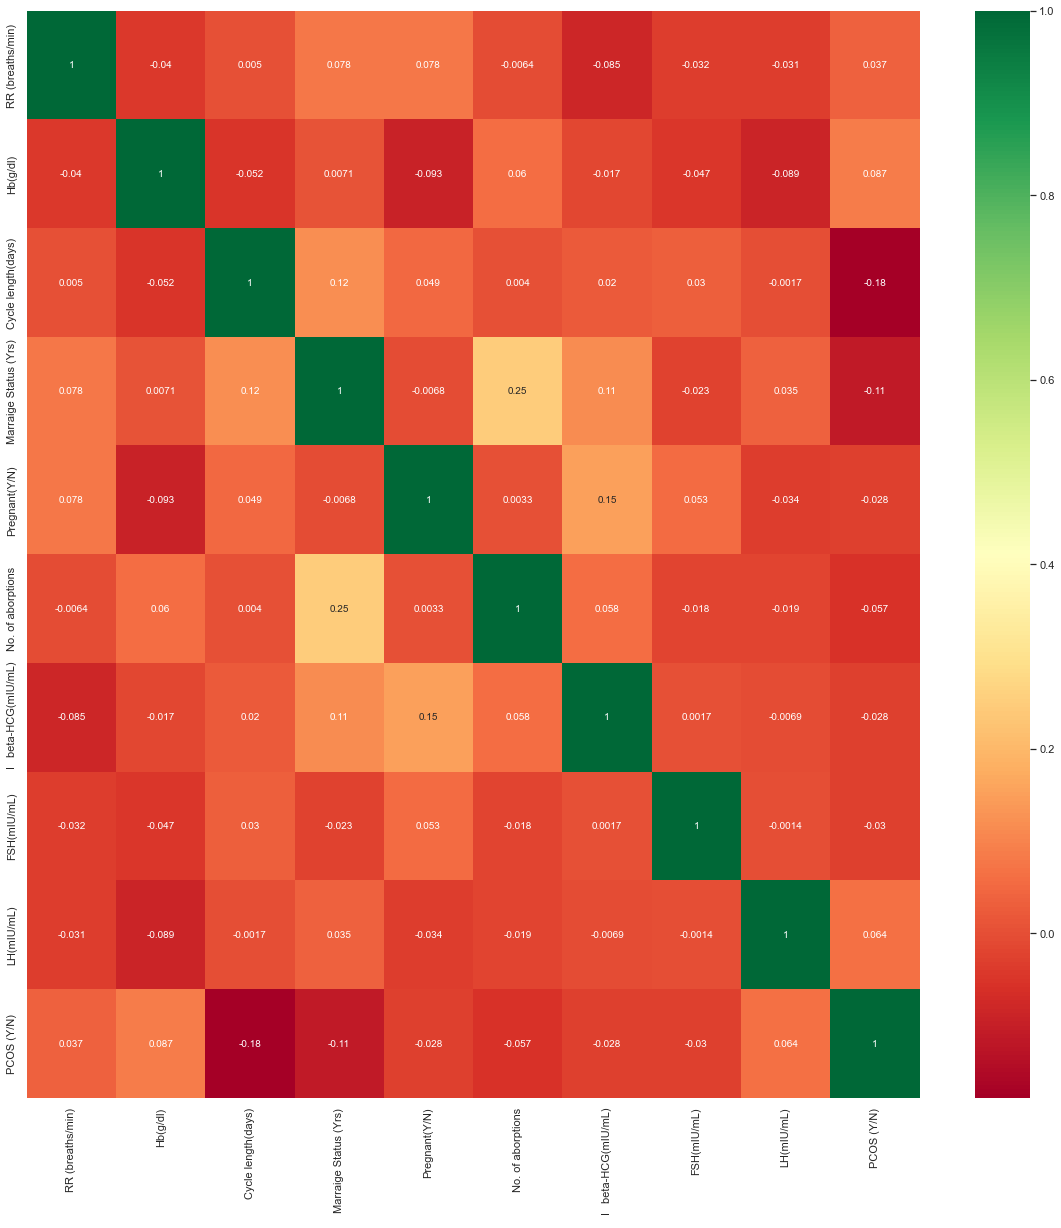

In [20]:
corrmat = df[['RR (breaths/min)','Hb(g/dl)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)','FSH(mIU/mL)',
       'LH(mIU/mL)','PCOS (Y/N)']].corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

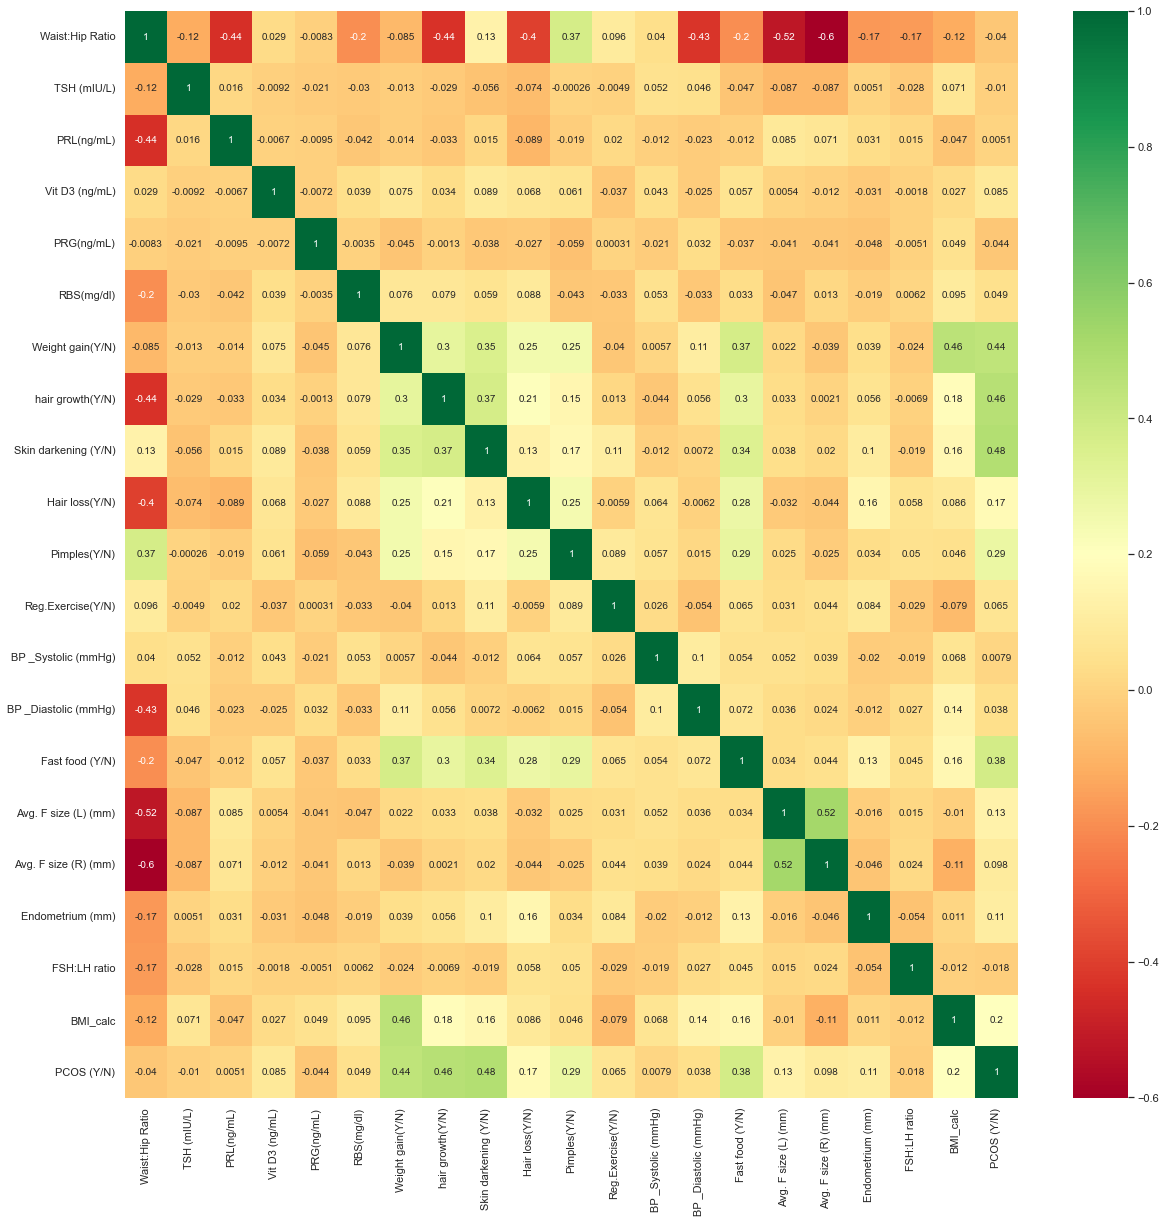

In [22]:
#get correlations of each features in dataset
corrmat = df[['Waist:Hip Ratio','II    beta-HCG(mIU/mL)','TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)','PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)','Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)','Fast food (Y/N)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)','FSH:LH ratio', 'BMI_calc','PCOS (Y/N)']].corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Baseline model

In [111]:
features = [' Age (yrs)', 'RR (breaths/min)','Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)','FSH(mIU/mL)',
       'LH(mIU/mL)','Waist:Hip Ratio','II    beta-HCG(mIU/mL)',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)','Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)','Fast food (Y/N)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)','FSH:LH ratio', 'BMI_calc', 'Follicle No. (L)', 'Follicle No. (R)']

#one-hot-encoding is done to convert the categorical variables into numerical integers so that the machine learning model 
#could work with it. One-hot-encoding is done when there is no ordinal relationships between the variables. 
X = pd.get_dummies(df[features].fillna(0))
y = df['PCOS (Y/N)']

#In this case first the data is split into training and test sets, and the training data set is further split into training
#and validation set, so that the model trained on training data set, can perform prediction on validation set. This is done so that the
#test data set remain untouched until the model is ready to make final prediction. 
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

In [112]:
#decision tree classifier for PCOS prediction
dt = DecisionTreeClassifier(max_depth=10)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_val)

print(classification_report(y_val, y_pred))
#calculation of area under the curve
auc = metrics.roc_auc_score(y_val, y_pred)
print(auc)

              precision    recall  f1-score   support

           0       0.93      0.86      0.90        80
           1       0.68      0.82      0.74        28

    accuracy                           0.85       108
   macro avg       0.80      0.84      0.82       108
weighted avg       0.87      0.85      0.86       108

0.8419642857142857


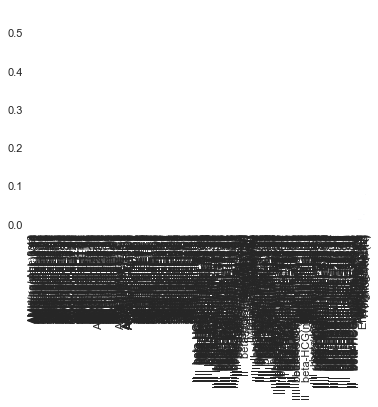

In [113]:
#finding feature importance
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(X_train, y_train)
pd.Series(dt.feature_importances_, index=X.columns).sort_values().plot(kind='bar');

In [98]:
#using logistic regression
logreg = LogisticRegression(C=1e5) 
#training the model
logreg.fit(X_train, y_train)

#prediction using the model
y_pred = logreg.predict(X_val)

print(classification_report(y_val, y_pred))

#printing the confusion matrix
confusion_matrix =metrics.confusion_matrix(y_val, y_pred) 
print(confusion_matrix)

#calculation of area under the curve
auc = metrics.roc_auc_score(y_val, y_pred)
print("auc score: " ,auc)

              precision    recall  f1-score   support

           0       0.97      0.89      0.93        80
           1       0.74      0.93      0.83        28

    accuracy                           0.90       108
   macro avg       0.86      0.91      0.88       108
weighted avg       0.91      0.90      0.90       108

[[71  9]
 [ 2 26]]
auc score:  0.9080357142857143


C:\Users\mehna\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [99]:
TP = confusion_matrix[1,1] # true positive
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

#calculation of sensitivity 
sensitivity = TP / float(TP+FN)
print("sensitivity: ",sensitivity)

# calculation of specificity
specificity = TN / float(TN+FP)
print("specificity: ",specificity)

sensitivity:  0.9285714285714286
specificity:  0.8875


In [100]:
#using random forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)
#printing the classficiation report
print(classification_report(y_val, y_pred))

#printing the confusion matrix
confusion_m =metrics.confusion_matrix(y_val, y_pred) 
print(confusion_m)

#calculation of area under the curve
auc = metrics.roc_auc_score(y_val, y_pred)
print("auc score: " ,auc)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        80
           1       0.88      0.82      0.85        28

    accuracy                           0.93       108
   macro avg       0.91      0.89      0.90       108
weighted avg       0.92      0.93      0.93       108

[[77  3]
 [ 5 23]]
auc score:  0.8919642857142858


In [101]:
TP = confusion_m[1,1] # true positive
TN = confusion_m[0,0] # true negatives
FP = confusion_m[0,1] # false positives
FN = confusion_m[1,0] # false negatives

#calculation of sensitivity 
sensitivity = TP / float(TP+FN)
print("sensitivity: ",sensitivity)

# calculation of specificity
specificity = TN / float(TN+FP)
print("specificity: ",specificity)

sensitivity:  0.8214285714285714
specificity:  0.9625


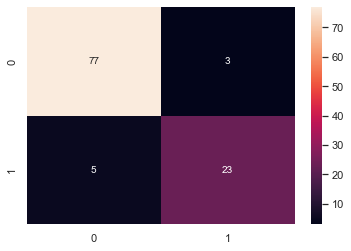

In [73]:
sns.heatmap(metrics.confusion_matrix(y_val, y_pred).round(3), annot=True);

In [123]:
#using random forest classifier
xgbcl = xgb.XGBClassifier()
xgbcl.fit(X_train, y_train)

y_pred = xgbcl.predict(X_val)
#printing the classficiation report
print(classification_report(y_val, y_pred))

#printing the confusion matrix
confusion_mat =metrics.confusion_matrix(y_val, y_pred) 
print("-----confusion matrix---------")
print(confusion_mat)

#calculation of area under the curve
auc = metrics.roc_auc_score(y_val, y_pred)
print("------------")
print("auc score: " ,auc)


C:\Users\mehna\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\mehna\Anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13:04:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        80
           1       0.81      0.93      0.87        28

    accuracy                           0.93       108
   macro avg       0.89      0.93      0.91       108
weighted avg       0.93      0.93      0.93       108

-----confusion matrix---------
[[74  6]
 [ 2 26]]
------------
auc score:  0.9267857142857143


In [86]:
TP = confusion_mat[1,1] # true positive
TN = confusion_mat[0,0] # true negatives
FP = confusion_mat[0,1] # false positives
FN = confusion_mat[1,0] # false negatives

#calculation of sensitivity 
sensitivity = TP / float(TP+FN)
print("sensitivity: ",sensitivity)

# calculation of specificity
specificity = TN / float(TN+FP)
print("specificity: ",specificity)

sensitivity:  0.9285714285714286
specificity:  0.925


C:\Users\mehna\Anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


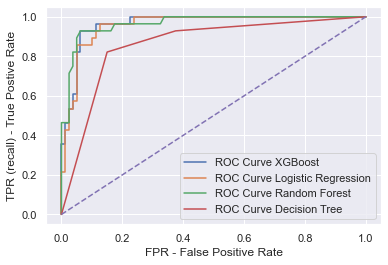

In [103]:
from sklearn.metrics import roc_curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_val, dt.predict_proba(X_val)[:, 1])
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_val, logreg.predict_proba(X_val)[:, 1])
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_val, rf.predict_proba(X_val)[:, 1])
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_val, xgbcl.predict_proba(X_val)[:, 1])
plt.plot(fpr_xgb, tpr_xgb, label="ROC Curve XGBoost")
plt.plot(fpr_lr, tpr_lr, label="ROC Curve Logistic Regression")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve Random Forest")
plt.plot(fpr_dt, tpr_dt, label="ROC Curve Decision Tree")
plt.ylabel("TPR (recall) - True Postive Rate")
plt.xlabel("FPR - False Positive Rate")
plt.plot([0, 1], ls="--")
plt.legend(loc=4);

In [127]:
print(cross_val_score(rf, X_train_full, y_train_full, scoring="roc_auc", cv = 5))
mean_score = cross_val_score(rf, X_train_full, y_train_full, scoring="roc_auc", cv = 5).mean()
print(mean_score)

[0.94619501 0.94857313 0.98124622 0.92891712 0.9676346 ]
0.958578968229134


In [128]:
print(cross_val_score(xgbcl, X_train_full, y_train_full, scoring="roc_auc", cv = 5))
mean_score = cross_val_score(xgbcl, X_train_full, y_train_full, scoring="roc_auc", cv = 5).mean()
print(mean_score)

C:\Users\mehna\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\mehna\Anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13:08:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mehna\Anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\mehna\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\mehna\Anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[13:08:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mehna\Anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\mehna\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\mehna\Anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[13:08:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mehna\Anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\mehna\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\mehna\Anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[13:08:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mehna\Anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\mehna\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\mehna\Anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[13:08:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mehna\Anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\mehna\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\mehna\Anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[0.9530321  0.93757432 0.94555354 0.91712039 0.92982456]
[13:08:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mehna\Anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\mehna\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\mehna\Anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[13:08:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mehna\Anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\mehna\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\mehna\Anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[13:08:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mehna\Anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\mehna\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\mehna\Anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[13:08:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mehna\Anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\mehna\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\mehna\Anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index,

[13:08:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9366209817051546


C:\Users\mehna\Anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Based on the AUC-ROC curve, AUC, specificity and sensitivity score I decide to go with XGBoost as the final classifier. 


(Sensitivity: the ability of a test to correctly identify patients with a disease, Specificity: the ability of a test to correctly identify people without the disease.)

### Hyper Parameter Optimization

In [60]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}
classifier=xgb.XGBClassifier()

In [53]:
#applicatin of random search
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [54]:
#fiting the random_search of hyper parameters onto the training dataset
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\mehna\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\mehna\Anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12:21:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           reg_alpha=None, reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                           verbosity=None),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [41]:
#best estimators for XGBoost using random search
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, gamma=0.0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [106]:
#XGBoost after hyper parameter tuning
classifier_hyperparam=xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, gamma=0.0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=7, missing=np.nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [114]:
#fitting into the training dataset
classifier_hyperparam.fit(X_train, y_train)

y_pred = classifier_hyperparam.predict(X_val)
#printing the classficiation report
print(classification_report(y_val, y_pred))

#printing the confusion matrix
confusion_mat =metrics.confusion_matrix(y_val, y_pred) 
print("-----confusion matrix---------")
print(confusion_mat)

#calculation of area under the curve
auc = metrics.roc_auc_score(y_val, y_pred)
print("------------")
print("auc score: " ,auc)

C:\Users\mehna\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\mehna\Anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13:01:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        80
           1       0.75      0.86      0.80        28

    accuracy                           0.89       108
   macro avg       0.85      0.88      0.86       108
weighted avg       0.90      0.89      0.89       108

-----confusion matrix---------
[[72  8]
 [ 4 24]]
------------
auc score:  0.8785714285714286


### Model Deployment

In [115]:
classifier_hyperparam.fit(X_train_full, y_train_full)
y_pred = classifier_hyperparam.predict(X_test)
#printing the classficiation report
print(classification_report(y_test, y_pred))

#printing the confusion matrix
confusion_mat =metrics.confusion_matrix(y_test, y_pred) 
print("-----confusion matrix---------")
print(confusion_mat)

#calculation of area under the curve
auc = metrics.roc_auc_score(y_test, y_pred)
print("------------")
print("auc score: " ,auc)

C:\Users\mehna\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\mehna\Anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13:01:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        77
           1       0.81      0.69      0.75        32

    accuracy                           0.86       109
   macro avg       0.85      0.81      0.83       109
weighted avg       0.86      0.86      0.86       109

-----confusion matrix---------
[[72  5]
 [10 22]]
------------
auc score:  0.8112824675324676
